<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             mean_absolute_error, mean_squared_error, r2_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv("/churn_dataset.csv")

# Preprocessing
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

Classification Metrics:
Accuracy: 0.9250
Precision: 0.8493
Recall: 0.6139
F1-score: 0.7126
ROC-AUC: 0.9218
Confusion Matrix:
[[555  11]
 [ 39  62]]


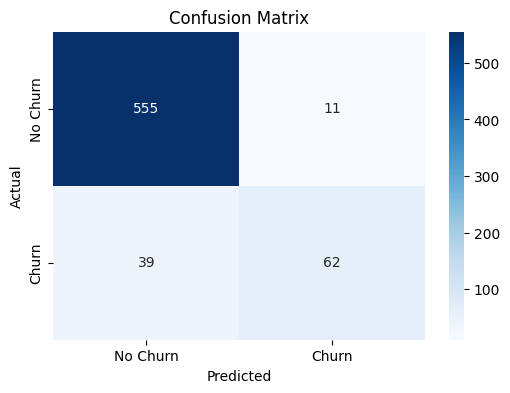

In [5]:
# Classification Metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

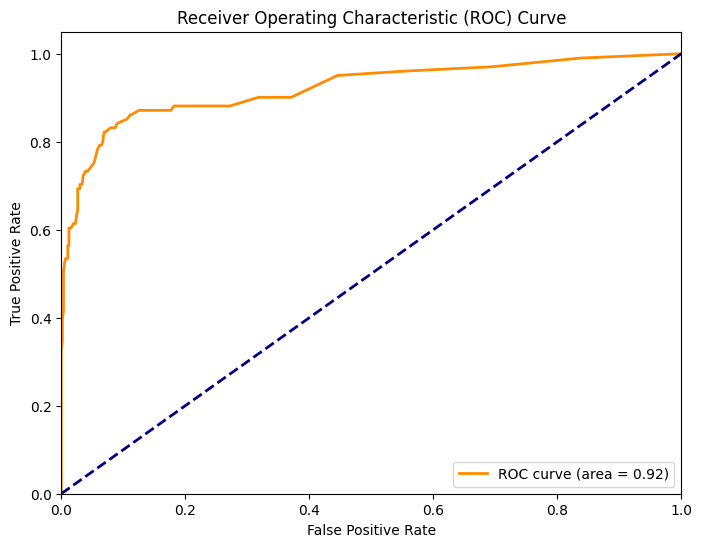

In [6]:
# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Regression Model (Predicting churn probability)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_reg_pred = reg.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_reg_pred)
mse = mean_squared_error(y_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_reg_pred)

print("\nRegression Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Regression Metrics:
MAE: 0.1175
MSE: 0.0578
RMSE: 0.2404
R-squared: 0.5504


**BONUS ASSIGNMENT**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# Load and preprocess the dataset
df = pd.read_csv("/churn_dataset.csv")  # Replace with your dataset
df = pd.get_dummies(df, drop_first=True)  # Encode categorical features
X, y = df.drop("Churn", axis=1), df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

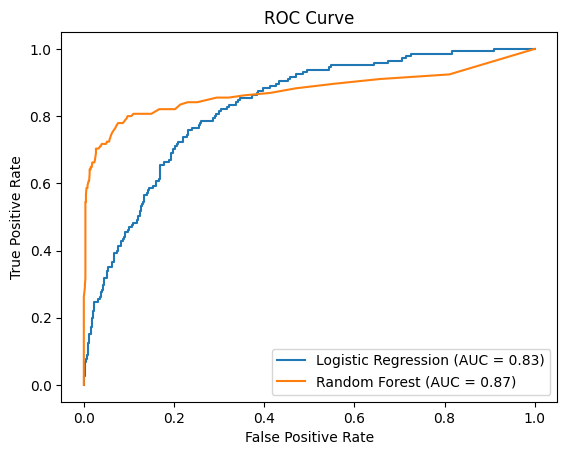

In [17]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")

# Train Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Plot combined ROC Curve
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


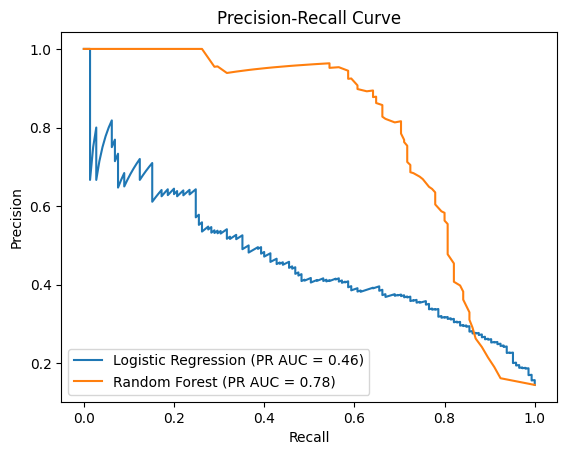

In [18]:
# Precision-Recall Curve for Logistic Regression
precision_log, recall_log, _ = precision_recall_curve(y_test, y_proba_log)
pr_auc_log = average_precision_score(y_test, y_proba_log)
plt.plot(recall_log, precision_log, label=f"Logistic Regression (PR AUC = {pr_auc_log:.2f})")

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)
plt.plot(recall_rf, precision_rf, label=f"Random Forest (PR AUC = {pr_auc_rf:.2f})")

# Plot combined Precision-Recall Curve
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Regression Metrics: MSE = 0.06, MAE = 0.12, R2 = 0.50


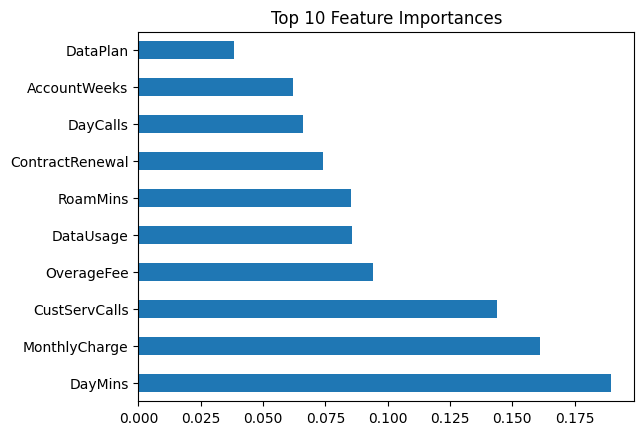

In [21]:
# Train Random Forest Regressor for Churn Probabilities
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)
y_pred = rf_reg.predict(X_test_scaled)

# Evaluate regression
mse, mae, r2 = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print(f"Regression Metrics: MSE = {mse:.2f}, MAE = {mae:.2f}, R2 = {r2:.2f}")

# Feature Importances for Random Forest Classifier
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).nlargest(10)
feature_importances.plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.show()